In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [3]:
#Testing a single image's shape to determine number of channels to import
import skimage as skimage
import os as os

tr_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/train_another/damage/-93.6141_30.754263.jpeg'

image_test = skimage.io.imread(tr_path)

image_test.shape

(128, 128, 3)

Training Set Import

In [4]:
#Since the channels are 3, we can use keras to import into a dataset.
tr_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/train_another/'

#Use Keras to import data
tr_dataset = keras.utils.image_dataset_from_directory(
    tr_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
tr_dataset = tr_dataset.unbatch()
tr_images = np.asarray(list(tr_dataset.map(lambda x, y: x)))
tr_labels = np.asarray(list(tr_dataset.map(lambda x, y: y)))

Found 10000 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [5]:
tr_images.shape

(10000, 128, 128, 3)

0: No Damage

1: Damage

0


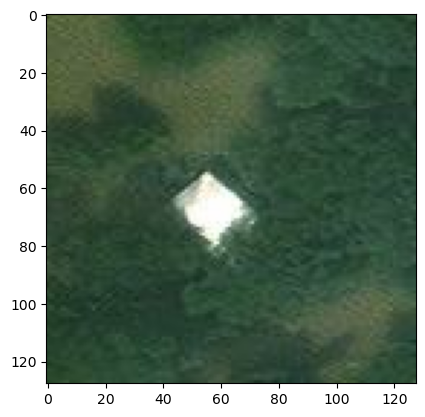

In [6]:
plt.imshow(tr_images[0].astype('uint8'))
print(tr_labels[5000])

Validation Set Import

In [15]:
#Since the channels are 3, we can use keras to import into a dataset.
val_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/validation_another/'

#Use Keras to import data
val_dataset = keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
val_dataset = val_dataset.unbatch()
val_images = np.asarray(list(val_dataset.map(lambda x, y: x)))
val_labels = np.asarray(list(val_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


Testing Set Import
There are two test sets for this data, one with imbalanced data (another_test) and one with balanced (test).

These will be kept for final testing.

In [16]:
#Since the channels are 3, we can use keras to import into a dataset.
test_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/test/'

#Use Keras to import data
test_dataset = keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
test_dataset = test_dataset.unbatch()
test_images = np.asarray(list(test_dataset.map(lambda x, y: x)))
test_labels = np.asarray(list(test_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


In [17]:
#Since the channels are 3, we can use keras to import into a dataset.
testPlus_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/test_another/'

#Use Keras to import data
testPlus_dataset = keras.utils.image_dataset_from_directory(
    testPlus_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
testPlus_plus_dataset = testPlus_dataset.unbatch()
testPlus_images = np.asarray(list(testPlus_dataset.map(lambda x, y: x)))
testPlus_labels = np.asarray(list(testPlus_dataset.map(lambda x, y: y)))

Found 9000 files belonging to 2 classes.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (282,) + inhomogeneous part.

In [23]:
x_tr_train, x_tr_test, y_tr_train, y_tr_test = train_test_split(tr_images, tr_labels, test_size=0.5, random_state=0)

#convert labels to binary class matrices
y_tr_train = to_categorical(y_tr_train)
y_tr_test = to_categorical(y_tr_test)

val_labels_cat = to_categorical(val_labels)

# Model 2: Transfer Learning with VGG16
Next, we will implement a transfer learning technique and apply a pre-trained model to our dataset. We are using VGG16 here. 

In [20]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.utils import plot_model

# loading VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# freezin layers from pre-trained model
for layer in vgg16.layers:
    layer.trainable = False

# adding a few other layers just in case
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# creating model
model = Model(inputs=vgg16.input, outputs=predictions)

# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

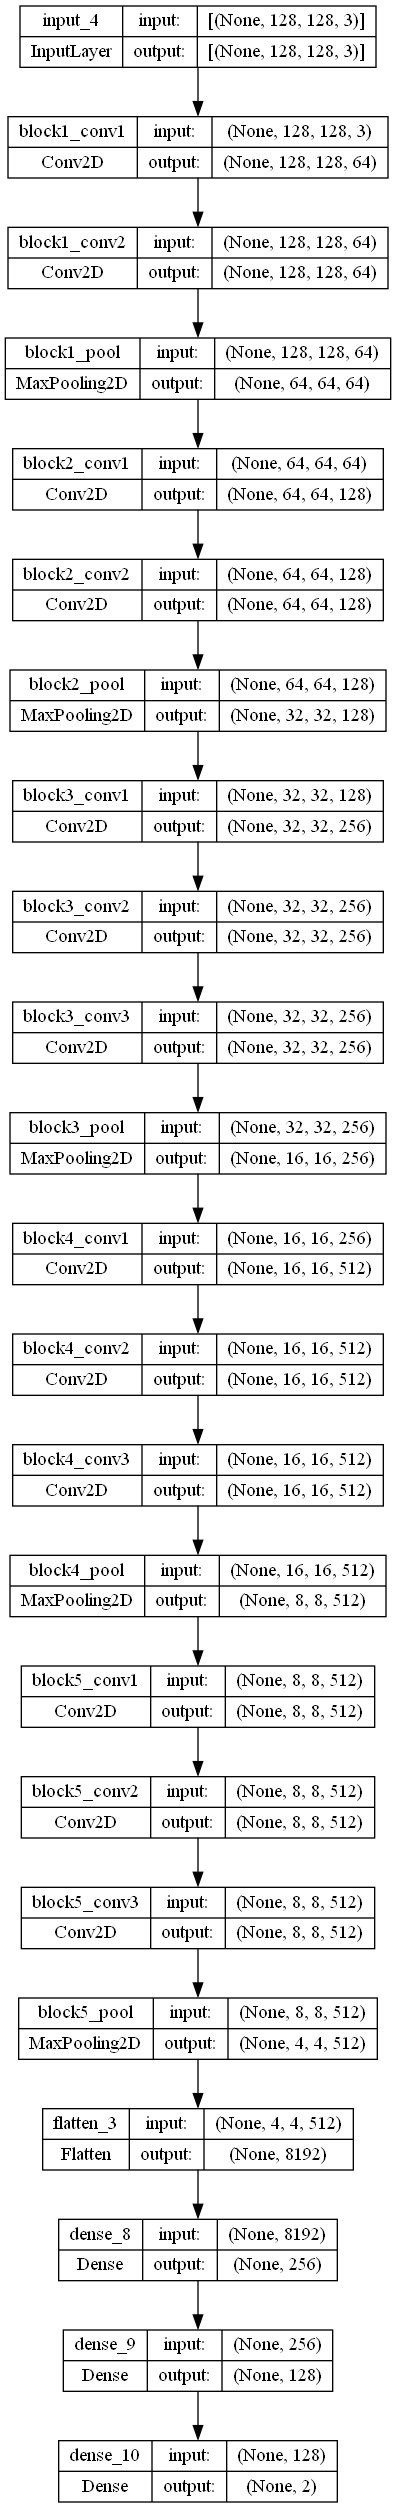

In [21]:
plot_model(model, 
    show_shapes=True, 
    show_layer_names=True
)

In [24]:
#fitting the model
history2 = model.fit(
    x_tr_train, y_tr_train,
    epochs=10, batch_size=16,
    validation_data=(x_tr_test, y_tr_test),
    verbose=1
)

Epoch 1/10
313/313 [==============================] - 352s 1s/step - loss: 0.7603 - accuracy: 0.8654 - val_loss: 0.2493 - val_accuracy: 0.9084
Epoch 2/10
313/313 [==============================] - 303s 968ms/step - loss: 0.1338 - accuracy: 0.9552 - val_loss: 0.2440 - val_accuracy: 0.9242
Epoch 3/10
313/313 [==============================] - 295s 944ms/step - loss: 0.0556 - accuracy: 0.9782 - val_loss: 0.2222 - val_accuracy: 0.9382
Epoch 4/10
313/313 [==============================] - 291s 931ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.3963 - val_accuracy: 0.9184
Epoch 5/10
313/313 [==============================] - 292s 935ms/step - loss: 0.0946 - accuracy: 0.9752 - val_loss: 0.3215 - val_accuracy: 0.9256
Epoch 6/10
313/313 [==============================] - 293s 937ms/step - loss: 0.1150 - accuracy: 0.9708 - val_loss: 0.3561 - val_accuracy: 0.9264
Epoch 7/10
313/313 [==============================] - 293s 938ms/step - loss: 0.0252 - accuracy: 0.9910 - val_loss: 0.3352 - va

Test loss: 0.35778895020484924
Test accuracy: 0.9408000111579895


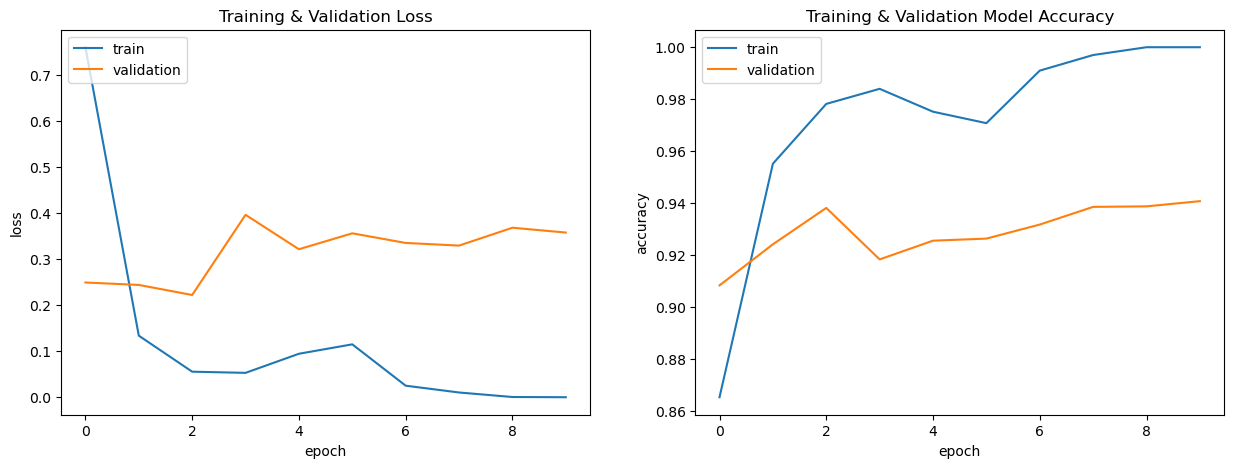

In [26]:
#accuracy of model
score1 = model.evaluate(x_tr_test, y_tr_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

#Plot both loss and accuracy in subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(history2.history['loss'])
ax1.plot(history2.history['val_loss'])
ax1.set_title('Training & Validation Loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
ax2.plot(history2.history['accuracy'])
ax2.plot(history2.history['val_accuracy'])
ax2.set_title('Training & Validation Model Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
y_pred = model.predict(x_tr_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# get the true class labels for test data
y_true_classes = np.argmax(y_tr_test, axis=1)

157/157 [==============================] - 141s 898ms/step


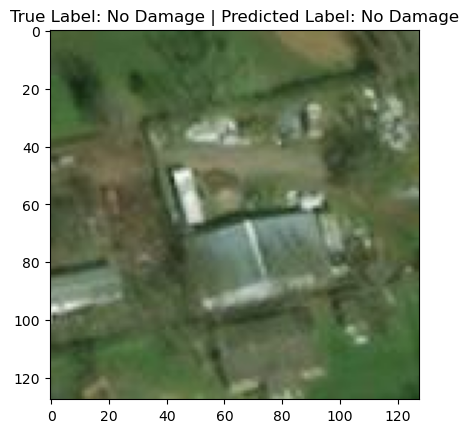

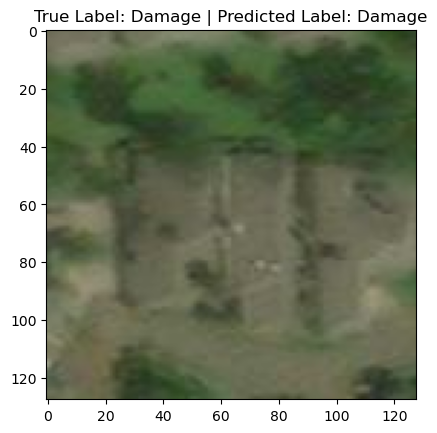

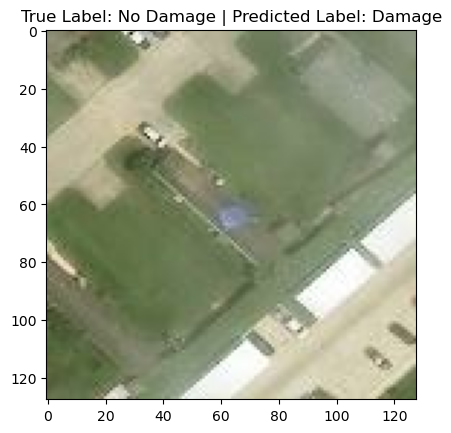

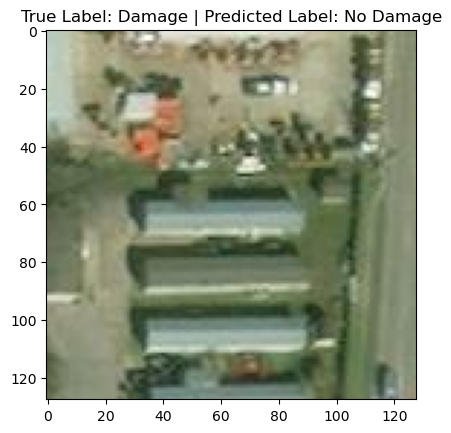

In [48]:
# find an index of a correct prediction
correct_idx1 = np.where((y_pred_classes == 0) & (y_true_classes == 0))[0][0]
correct_idx2 = np.where((y_pred_classes == 1) & (y_true_classes == 1))[0][1]

# find an index of an incorrect prediction
incorrect_idx1 = np.where((y_pred_classes == 0) & (y_true_classes == 1))[0][0]
incorrect_idx2 = np.where((y_pred_classes == 1) & (y_true_classes == 0))[0][0]

# plot the correct prediction
plt.imshow(x_tr_test[correct_idx1].astype('uint8'))
plt.title("True Label: No Damage | Predicted Label: No Damage")
plt.show()
                        
# plot the correct prediction
plt.imshow(x_tr_test[correct_idx2].astype('uint8'))
plt.title("True Label: Damage | Predicted Label: Damage")
plt.show()

# plot the incorrect prediction
plt.imshow(x_tr_test[incorrect_idx1].astype('uint8'))
plt.title("True Label: No Damage | Predicted Label: Damage")
plt.show()
                        
# plot the incorrect prediction
plt.imshow(x_tr_test[incorrect_idx2].astype('uint8'))
plt.title("True Label: Damage | Predicted Label: No Damage")
plt.show()